In [1]:
import tweepy

In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [3]:
# GetOldTweet3 사용 준비
try:
    import GetOldTweets3 as got
except:
    !pip install GetOldTweets3
    import GetOldTweets3 as got

In [4]:
# BeautifulSoup4 사용 준비
try:
    from bs4 import BeautifulSoup
except:
    !pip install bs4
    from bs4 import BeautifulSoup

In [5]:
import datetime
import time

In [6]:
days_range = []

start = datetime.datetime.strptime("2019-07-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2019-08-01", "%Y-%m-%d") 
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

In [7]:
for date in date_generated:
    days_range.append(date.strftime("%Y-%m-%d"))
    
days_range

['2019-07-01',
 '2019-07-02',
 '2019-07-03',
 '2019-07-04',
 '2019-07-05',
 '2019-07-06',
 '2019-07-07',
 '2019-07-08',
 '2019-07-09',
 '2019-07-10',
 '2019-07-11',
 '2019-07-12',
 '2019-07-13',
 '2019-07-14',
 '2019-07-15',
 '2019-07-16',
 '2019-07-17',
 '2019-07-18',
 '2019-07-19',
 '2019-07-20',
 '2019-07-21',
 '2019-07-22',
 '2019-07-23',
 '2019-07-24',
 '2019-07-25',
 '2019-07-26',
 '2019-07-27',
 '2019-07-28',
 '2019-07-29',
 '2019-07-30',
 '2019-07-31']

In [8]:
# 수집 기간 맞추기
start_date = days_range[0]
end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d") 
            + datetime.timedelta(days=1)).strftime("%Y-%m-%d") # setUntil이 끝을 포함하지 않으므로, day + 1

In [9]:
# 트윗 수집 기준 정의
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('일본 불매운동')\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)

In [10]:
# 수집 with GetOldTweet3
print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))

start_time = time.time()

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
print("=== Total num of tweets is {} ===".format(len(tweet)))


=== Total num of tweets is 16491 ===


In [11]:
from random import uniform
from tqdm import tqdm_notebook

In [12]:
# initialize
tweet_list = []

for index in tqdm_notebook(tweet):
    #content = index.text
    tweet_date = index.date.strftime("%Y-%m-%d")
    
    tweet_list.append(tweet_date)
    
    time.sleep(1)

In [13]:
import pandas as pd

In [14]:
twitter_df=pd.DataFrame(tweet_list,columns=["날짜"])

In [15]:
#파일 만들기
twitter_df.to_excel("Date19_twitter_{}_to_{}.xlsx".format(days_range[0], days_range[-1]), index=False)
print("=== {}tweets are successfully saved ===".format(len(tweet_list)))

=== 16491tweets are successfully saved ===


## 시계열 만들기

In [16]:
import pandas as pd
df1=pd.read_excel("twitter_data_2019-07-01_to_2019-09-09.xlsx")
a1=df1["날짜"].unique()
date_cnt1=[]

for i in range(0,len(a1)):
    date_cnt1.append(0)

for i in range(0,len(df1)):
    for j in range(0,len(a1)):
        if a1[j]==df1["날짜"][i]:
            date_cnt1[j]+=1
        

            


In [39]:
f1=pd.DataFrame({"날짜":a1,"댓글수":date_cnt1})
f1=f1.sort_values(["날짜"],ascending=[True])

df=f1

In [40]:
df=df["댓글수"]

C:\Python\py\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\py\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


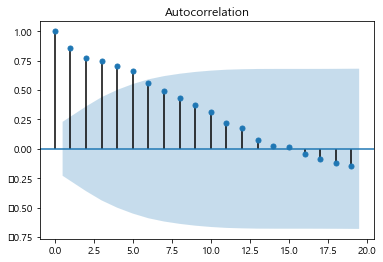

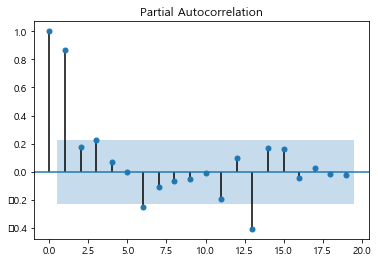

In [41]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(df)
plot_pacf(df)
plt.show()


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (300,100)

%matplotlib inline

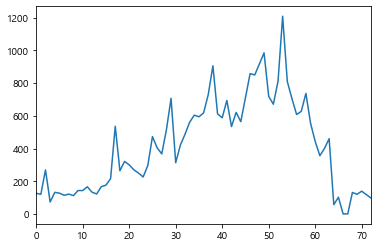

In [42]:
df.plot()
plt.show()

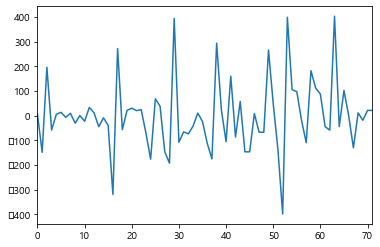

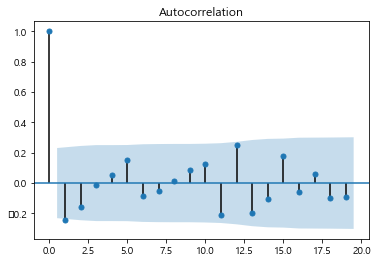

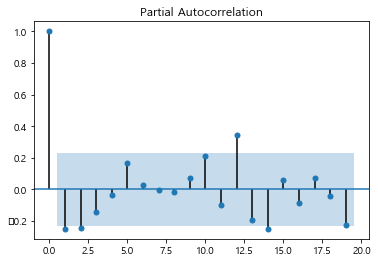

In [43]:
diff_1=df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()


In [44]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())


C:\Python\py\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Python\py\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.댓글수   No. Observations:                   72
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -455.412
Method:                       css-mle   S.D. of innovations            134.976
Date:                Thu, 19 Sep 2019   AIC                            914.824
Time:                        06:45:47   BIC                            919.377
Sample:                             1   HQIC                           916.636
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.댓글수    -0.3870      0.118     -3.280      0.002      -0.618      -0.156
                                    Roots                                    
                  Real          Imaginary         

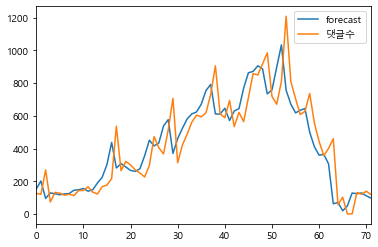

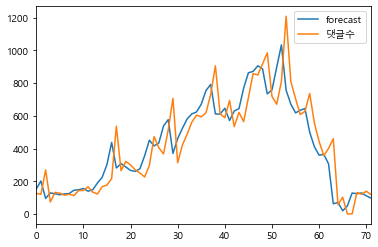

In [45]:
model_fit.plot_predict()

In [46]:
fore = model_fit.forecast(steps=1)
print(fore)
#위 코드의 결과 순서대로 예측값, stderr, upper bound, lower bound 이다.

(array([135.88102876]), array([134.97612672]), array([[-128.66731839,  400.42937591]]))
